# evaluations

In [1]:
import jsonlines
import numpy as np
from tqdm import tqdm
from collections import Counter
from rouge import Rouge

### Precision, Recall, F1
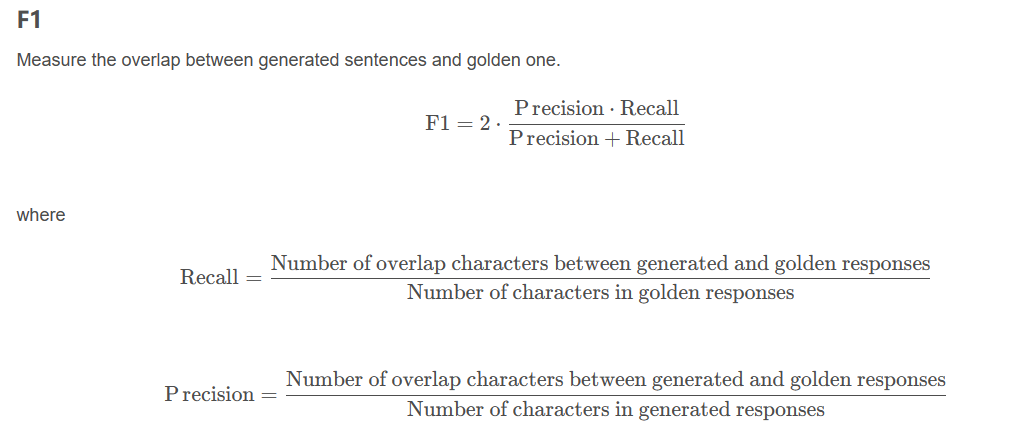

In [2]:
import jsonlines
import numpy as np
from tqdm import tqdm
from collections import Counter

'''here is my own data'''
precision_list = []
recall_list = []
f1_score_list = []
#load the answers and the generated_answers
with jsonlines.open("./MASHQA/select_response.jsonl") as reader:
    reader = list(reader)
    for i, line in tqdm(enumerate(reader), total=len(reader)):
        answer = line["answer"][0]
        generated_answer = line["generated_answer"]
        answer = answer.replace(".", " ")
        answer = answer.replace("\n", " ")
        answer = answer.replace("\t", " ")
        generated_answer = generated_answer.replace(".", " ")
        generated_answer = generated_answer.replace("\n", " ")
        generated_answer = generated_answer.replace("\t", " ")
        
        reference_tokens = answer.split()
        hypothesis_tokens = generated_answer.split()
        
        # print("1:", Counter(reference_tokens))
        # print("2:", Counter(hypothesis_tokens))
        common = Counter(reference_tokens) & Counter(hypothesis_tokens)
        # print("3:", common)
        overlap = sum(common.values())
        # print(overlap)
        number_golden = len(reference_tokens)
        number_generated = len(hypothesis_tokens)
        precision = (overlap + 1) / (number_generated + 1)
        recall = (overlap + 1) / (number_golden + 1)
        f1_score = 2 * (precision * recall) / (precision + recall)
        
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)
precision_avg = np.mean(precision_list)
recall_avg = np.mean(recall_list)
f1_score_avg = np.mean(f1_score_list)
print("alpaca-lora-7b: MASHQA-select")
print("precision_avg:", precision_avg)
print("recall_avg:", recall_avg)
print("f1_score_avg:", f1_score_avg)

100%|██████████| 50/50 [00:00<00:00, 24617.35it/s]

alpaca-lora-7b: MASHQA-select
precision_avg: 0.38008964053997757
recall_avg: 0.19684231691589787
f1_score_avg: 0.2226810825228403


In [3]:
import jsonlines
import numpy as np
from tqdm import tqdm
from collections import Counter

'''here is my own data'''
precision_list = []
recall_list = []
f1_score_list = []
#load the answers and the generated_answers
with jsonlines.open("./MEDIQA2019/select_response.jsonl") as reader:
    reader = list(reader)
    for i, line in tqdm(enumerate(reader), total=len(reader)):
        answer = line["answer"][0]
        generated_answer = line["generated_answer"]
        answer = answer.replace(".", " ")
        answer = answer.replace("\n", " ")
        answer = answer.replace("\t", " ")
        generated_answer = generated_answer.replace(".", " ")
        generated_answer = generated_answer.replace("\n", " ")
        generated_answer = generated_answer.replace("\t", " ")
        
        reference_tokens = answer.split()
        hypothesis_tokens = generated_answer.split()
        
        # print("1:", Counter(reference_tokens))
        # print("2:", Counter(hypothesis_tokens))
        common = Counter(reference_tokens) & Counter(hypothesis_tokens)
        # print("3:", common)
        overlap = sum(common.values())
        # print(overlap)
        number_golden = len(reference_tokens)
        number_generated = len(hypothesis_tokens)
        precision = (overlap + 1) / (number_generated + 1)
        recall = (overlap + 1) / (number_golden + 1)
        f1_score = 2 * (precision * recall) / (precision + recall)
        
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)
precision_avg = np.mean(precision_list)
recall_avg = np.mean(recall_list)
f1_score_avg = np.mean(f1_score_list)
print("alpaca-lora-7b: MEDIQA2019-select")
print("precision_avg:", precision_avg)
print("recall_avg:", recall_avg)
print("f1_score_avg:", f1_score_avg)

100%|██████████| 50/50 [00:00<00:00, 5518.09it/s]

alpaca-lora-7b: MEDIQA2019-select
precision_avg: 0.47090116182845315
recall_avg: 0.07712394774327808
f1_score_avg: 0.11033367225119937


## ROUGE-L
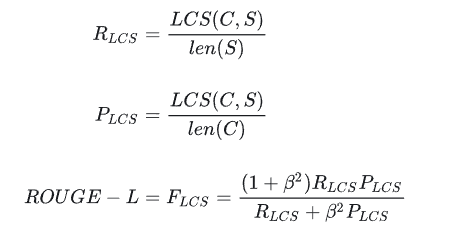

In [4]:
from rouge import Rouge
R_L_list = []
rouge = Rouge()
with jsonlines.open("./MASHQA/select_response.jsonl") as reader:
    reader = list(reader)
    for i, line in tqdm(enumerate(reader), total=len(reader)):
        answer = line["answer"][0]
        generated_answer = line["generated_answer"]
        # answer = answer.replace(".", " ")
        answer = answer.replace("\n", " ")
        answer = answer.replace("\t", " ")
        # generated_answer = generated_answer.replace(".", " ")
        generated_answer = generated_answer.replace("\n", " ")
        generated_answer = generated_answer.replace("\t", " ")
        rouge_score = rouge.get_scores(generated_answer, answer)
        R_L_list.append(rouge_score[0]["rouge-l"]["f"])
import numpy as np
R_L_avg = np.mean(R_L_list)
print("alpaca-lora-7b: MASHQA-select")
print("R-L:", R_L_avg)

100%|██████████| 50/50 [00:00<00:00, 323.36it/s]

alpaca-lora-7b: MASHQA-select
R-L: 0.19380183134880288


In [5]:
from rouge import Rouge
R_L_list = []
rouge = Rouge()
with jsonlines.open("./MEDIQA2019/select_response.jsonl") as reader:
    reader = list(reader)
    for i, line in tqdm(enumerate(reader), total=len(reader)):
        answer = line["answer"][0]
        generated_answer = line["generated_answer"]
        # answer = answer.replace(".", " ")
        answer = answer.replace("\n", " ")
        answer = answer.replace("\t", " ")
        # generated_answer = generated_answer.replace(".", " ")
        generated_answer = generated_answer.replace("\n", " ")
        generated_answer = generated_answer.replace("\t", " ")
        rouge_score = rouge.get_scores(generated_answer, answer)
        R_L_list.append(rouge_score[0]["rouge-l"]["f"])
import numpy as np
R_L_avg = np.mean(R_L_list)
print("alpaca-lora-7b: MEDIQA2019-select")
print("R-L:", R_L_avg)

100%|██████████| 50/50 [00:00<00:00, 70.89it/s]

alpaca-lora-7b: MEDIQA2019-select
R-L: 0.1118366257993195


## CtrlEval

In [6]:
from CTRLEval.ctrleval import CTRLEval
task = 'topic'
scorer = CTRLEval(iwf_dir="./CTRLEval/iwf_full.txt",
                  prompt_dir="./CTRLEval/prompt/prompt_{}.txt".format(task),
                  verbal_dir="./CTRLEval/prompt/verbal_{}.txt".format(task),
                  model_name_or_path="/root/autodl-fs/pegasus-large")

ctrleval_list = []
data_list = []
prefix_list = []
with jsonlines.open("./MASHQA/select_response.jsonl") as reader:
    reader = list(reader)
    for i, line in tqdm(enumerate(reader), total=len(reader)):
        prefix = line["question"]
        answer = line["answer"][0]
        generated_answer = line["generated_answer"]
        # answer = answer.replace(".", " ")
        answer = answer.replace("\n", " ")
        answer = answer.replace("\t", " ")
        # generated_answer = generated_answer.replace(".", " ")
        generated_answer = generated_answer.replace("\n", " ")
        generated_answer = generated_answer.replace("\t", " ")
        data = prefix+generated_answer
        data_list.append(data)
        prefix_list.append(prefix)
ctrleval = scorer.score(aspect="cons", data=data_list, prefix=prefix_list, batch_size=1)

ctrleval_avg = np.mean(ctrleval)
print("alpaca-lora-7b: MASHQA-select")
print("ctrleval_avg:", ctrleval_avg)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at /root/autodl-fs/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 100/100 [00:02<00:00, 34.57it/s]

alpaca-lora-7b: MASHQA-select
ctrleval_avg: -1.8500738055115376


In [7]:
from CTRLEval.ctrleval import CTRLEval
task = 'topic'
scorer = CTRLEval(iwf_dir="./CTRLEval/iwf_full.txt",
                  prompt_dir="./CTRLEval/prompt/prompt_{}.txt".format(task),
                  verbal_dir="./CTRLEval/prompt/verbal_{}.txt".format(task),
                  model_name_or_path="/root/autodl-fs/pegasus-large")

ctrleval_list = []
data_list = []
prefix_list = []
with jsonlines.open("./MEDIQA2019/select_response.jsonl") as reader:
    reader = list(reader)
    for i, line in tqdm(enumerate(reader), total=len(reader)):
        prefix = line["question"]
        answer = line["answer"][0]
        generated_answer = line["generated_answer"]
        # answer = answer.replace(".", " ")
        answer = answer.replace("\n", " ")
        answer = answer.replace("\t", " ")
        # generated_answer = generated_answer.replace(".", " ")
        generated_answer = generated_answer.replace("\n", " ")
        generated_answer = generated_answer.replace("\t", " ")
        data = prefix+generated_answer
        data_list.append(data)
        prefix_list.append(prefix)
ctrleval = scorer.score(aspect="cons", data=data_list, prefix=prefix_list, batch_size=1)

ctrleval_avg = np.mean(ctrleval)
print("alpaca-lora-7b: MEDIQA2019-select")
print("ctrleval_avg:", ctrleval_avg)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at /root/autodl-fs/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 100/100 [00:02<00:00, 38.37it/s]

alpaca-lora-7b: MEDIQA2019-select
ctrleval_avg: -2.746364884089019


## MedNLI

In [8]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from nltk.tokenize import sent_tokenize
import numpy as np
import jsonlines
from tqdm import tqdm
import os
    
def classify_text(model, tokenizer, text):
    encoding = tokenizer.encode_plus(text, return_tensors="pt")
    input_ids = encoding["input_ids"].to(model.device)
    attention_masks = encoding["attention_mask"].to(model.device)
    try:
        outputs = model.generate(
            input_ids=input_ids, 
            attention_mask=attention_masks,
            max_length=8,
            early_stopping=True
        )
    except:
        print("classify_text", text, len(tokenizer.encode(text)))
    result = tokenizer.decode(outputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    if "contradiction" in result:
        return "contradiction", -1
    if "entailment" in result:
        return "entailment", 1
    return "neutral", 0
    
    
    
def truncate(tokenizer, text):
    ids = tokenizer.encode(text)
    return tokenizer.decode(ids[:2000])
    

tokenizer = AutoTokenizer.from_pretrained("/root/autodl-tmp/SciFive_large_Pubmed_PMC_MedNLI")  
model = AutoModelForSeq2SeqLM.from_pretrained("/root/autodl-tmp/SciFive_large_Pubmed_PMC_MedNLI")
model.cuda()

data_file = "./MASHQA/select_response.jsonl"
out_file = "./MedNLI-select/MASHQA/results.jsonl"
if os.path.exists(data_file):

    overall_results_compare_answer = []
    sent_results_compare_answer = []
    overall_results_compare_context = []
    sent_results_compare_context = []

    with jsonlines.open(data_file) as reader, jsonlines.open(out_file, mode='w') as writer:
        for line in tqdm(reader):
            generated_answer = line['generated_answer']
            generated_answer_sents = sent_tokenize(generated_answer)
            answer = line['answer'][0]
            answer = truncate(tokenizer, answer)
            text = f"mednli: sentence1: {answer} sentence2: {generated_answer}"
            res = classify_text(model, tokenizer, text)
            line.update({"overall_compare_answer": res[0]})
            overall_results_compare_answer.append(res[1])

            sent_each_sample = []
            for i, sent in enumerate(generated_answer_sents):
                text = f"mednli: sentence1: {answer} sentence2: {sent}"
                res = classify_text(model, tokenizer, text)
                line.update({f"sent_{i}_compare_answer": [sent, res[0]]})
                sent_each_sample.append(res[1])
            sent_results_compare_answer.append(np.nanmean(sent_each_sample))


#                         if line['context']:
#                             context = line['context']
#                             text = f"mednli: sentence1: {context} sentence2: {generated_answer}"
#                             res = classify_text(model, tokenizer, text)
#                             line.update({"overall_compare_context": res[0]})
#                             overall_results_compare_context.append(res[1])

#                             sent_each_sample = []
#                             for i, sent in enumerate(generated_answer_sents):
#                                 text = f"mednli: sentence1: {context} sentence2: {sent}"
#                                 res = classify_text(model, tokenizer, text)
#                                 line.update({f"sent_{i}_compare_context": [sent, res[0]]})
#                                 sent_each_sample.append(res[1])
#                             sent_results_compare_context.append(np.nanmean(sent_each_sample))

            writer.write(line)

    out_file = '.'.join(out_file.split('.')[:-1])+".txt"
    with open(out_file, 'w') as f:
        f.write(f'compare with answer\n')
        f.write(f"{np.nanmean(overall_results_compare_answer)}\t{np.nanmean(sent_results_compare_answer)}\n")

        if overall_results_compare_context:
            f.write('compare with context\n')
            f.write(f"{np.nanmean(overall_results_compare_context)}\t{np.nanmean(sent_results_compare_context)}")


else:
    print(f'no exists {data_file}')

0it [00:00, ?it/s]/root/miniconda3/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:418: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
50it [00:18,  2.67it/s]


In [9]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from nltk.tokenize import sent_tokenize
import numpy as np
import jsonlines
from tqdm import tqdm
import os
    
def classify_text(model, tokenizer, text):
    encoding = tokenizer.encode_plus(text, return_tensors="pt")
    input_ids = encoding["input_ids"].to(model.device)
    attention_masks = encoding["attention_mask"].to(model.device)
    try:
        outputs = model.generate(
            input_ids=input_ids, 
            attention_mask=attention_masks,
            max_length=8,
            early_stopping=True
        )
    except:
        print("classify_text", text, len(tokenizer.encode(text)))
    result = tokenizer.decode(outputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    if "contradiction" in result:
        return "contradiction", -1
    if "entailment" in result:
        return "entailment", 1
    return "neutral", 0
    
    
    
def truncate(tokenizer, text):
    ids = tokenizer.encode(text)
    return tokenizer.decode(ids[:2000])
    

tokenizer = AutoTokenizer.from_pretrained("/root/autodl-tmp/SciFive_large_Pubmed_PMC_MedNLI")  
model = AutoModelForSeq2SeqLM.from_pretrained("/root/autodl-tmp/SciFive_large_Pubmed_PMC_MedNLI")
model.cuda()

data_file = "./MEDIQA2019/select_response.jsonl"
out_file = "./MedNLI-select/MEDIQA2019/results.jsonl"
if os.path.exists(data_file):

    overall_results_compare_answer = []
    sent_results_compare_answer = []
    overall_results_compare_context = []
    sent_results_compare_context = []

    with jsonlines.open(data_file) as reader, jsonlines.open(out_file, mode='w') as writer:
        for line in tqdm(reader):
            generated_answer = line['generated_answer']
            generated_answer_sents = sent_tokenize(generated_answer)
            answer = line['answer'][0]
            answer = truncate(tokenizer, answer)
            text = f"mednli: sentence1: {answer} sentence2: {generated_answer}"
            res = classify_text(model, tokenizer, text)
            line.update({"overall_compare_answer": res[0]})
            overall_results_compare_answer.append(res[1])

            sent_each_sample = []
            for i, sent in enumerate(generated_answer_sents):
                text = f"mednli: sentence1: {answer} sentence2: {sent}"
                res = classify_text(model, tokenizer, text)
                line.update({f"sent_{i}_compare_answer": [sent, res[0]]})
                sent_each_sample.append(res[1])
            sent_results_compare_answer.append(np.nanmean(sent_each_sample))


#                         if line['context']:
#                             context = line['context']
#                             text = f"mednli: sentence1: {context} sentence2: {generated_answer}"
#                             res = classify_text(model, tokenizer, text)
#                             line.update({"overall_compare_context": res[0]})
#                             overall_results_compare_context.append(res[1])

#                             sent_each_sample = []
#                             for i, sent in enumerate(generated_answer_sents):
#                                 text = f"mednli: sentence1: {context} sentence2: {sent}"
#                                 res = classify_text(model, tokenizer, text)
#                                 line.update({f"sent_{i}_compare_context": [sent, res[0]]})
#                                 sent_each_sample.append(res[1])
#                             sent_results_compare_context.append(np.nanmean(sent_each_sample))

            writer.write(line)

    out_file = '.'.join(out_file.split('.')[:-1])+".txt"
    with open(out_file, 'w') as f:
        f.write(f'compare with answer\n')
        f.write(f"{np.nanmean(overall_results_compare_answer)}\t{np.nanmean(sent_results_compare_answer)}\n")

        if overall_results_compare_context:
            f.write('compare with context\n')
            f.write(f"{np.nanmean(overall_results_compare_context)}\t{np.nanmean(sent_results_compare_context)}")


else:
    print(f'no exists {data_file}')

50it [00:23,  2.12it/s]
